# Pattern Recognition Class Final Project
### Task: make clasifier model from scratch
Author: Syahrul Fadholi G (17/414590/PA/18090)

Project Details:
1. Dataset used: Iris Flower Dataset
2. Classifer model: Multi-Layer Perceptron (MLP)

In [355]:
# import library needed
import os            # for opening file or directory
import pandas as pd  # for load and process raw dataset
import numpy as np   # for numerical calculation
import random        # for making random number
from pandas.plotting import scatter_matrix # for scatter plotting visualization

In [356]:
!pwd

/Users/arul/SelfLearn/PengPol_final_project/iris_dataset


### Dataset Brief Information

The Iris Flower Dataset, also called Fisher’s Iris, is a dataset introduced by Ronald Fisher, a British statistician, and biologist, with several contributions to science. Ronald Fisher has well known worldwide for his paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It was in this paper that Ronald Fisher introduced the Iris flower dataset.
The iris database consists of 50 samples distributed among three different species of iris. Each of these samples has specific characteristics, which allows them to be classified into three categories: Iris Setosa, Iris Virginica, and Iris versicolor. 

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png">

### Load and Examine Dataset

In [357]:
# set working directory and load data
os.chdir('/Users/arul/SelfLearn/PengPol_final_project/iris_dataset')

# load and check dataset using pandas
iris_dataset = pd.read_csv('iris.csv')
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [358]:
iris_dataset[50:56]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor


In [359]:
iris_dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### Visualize raw dataset

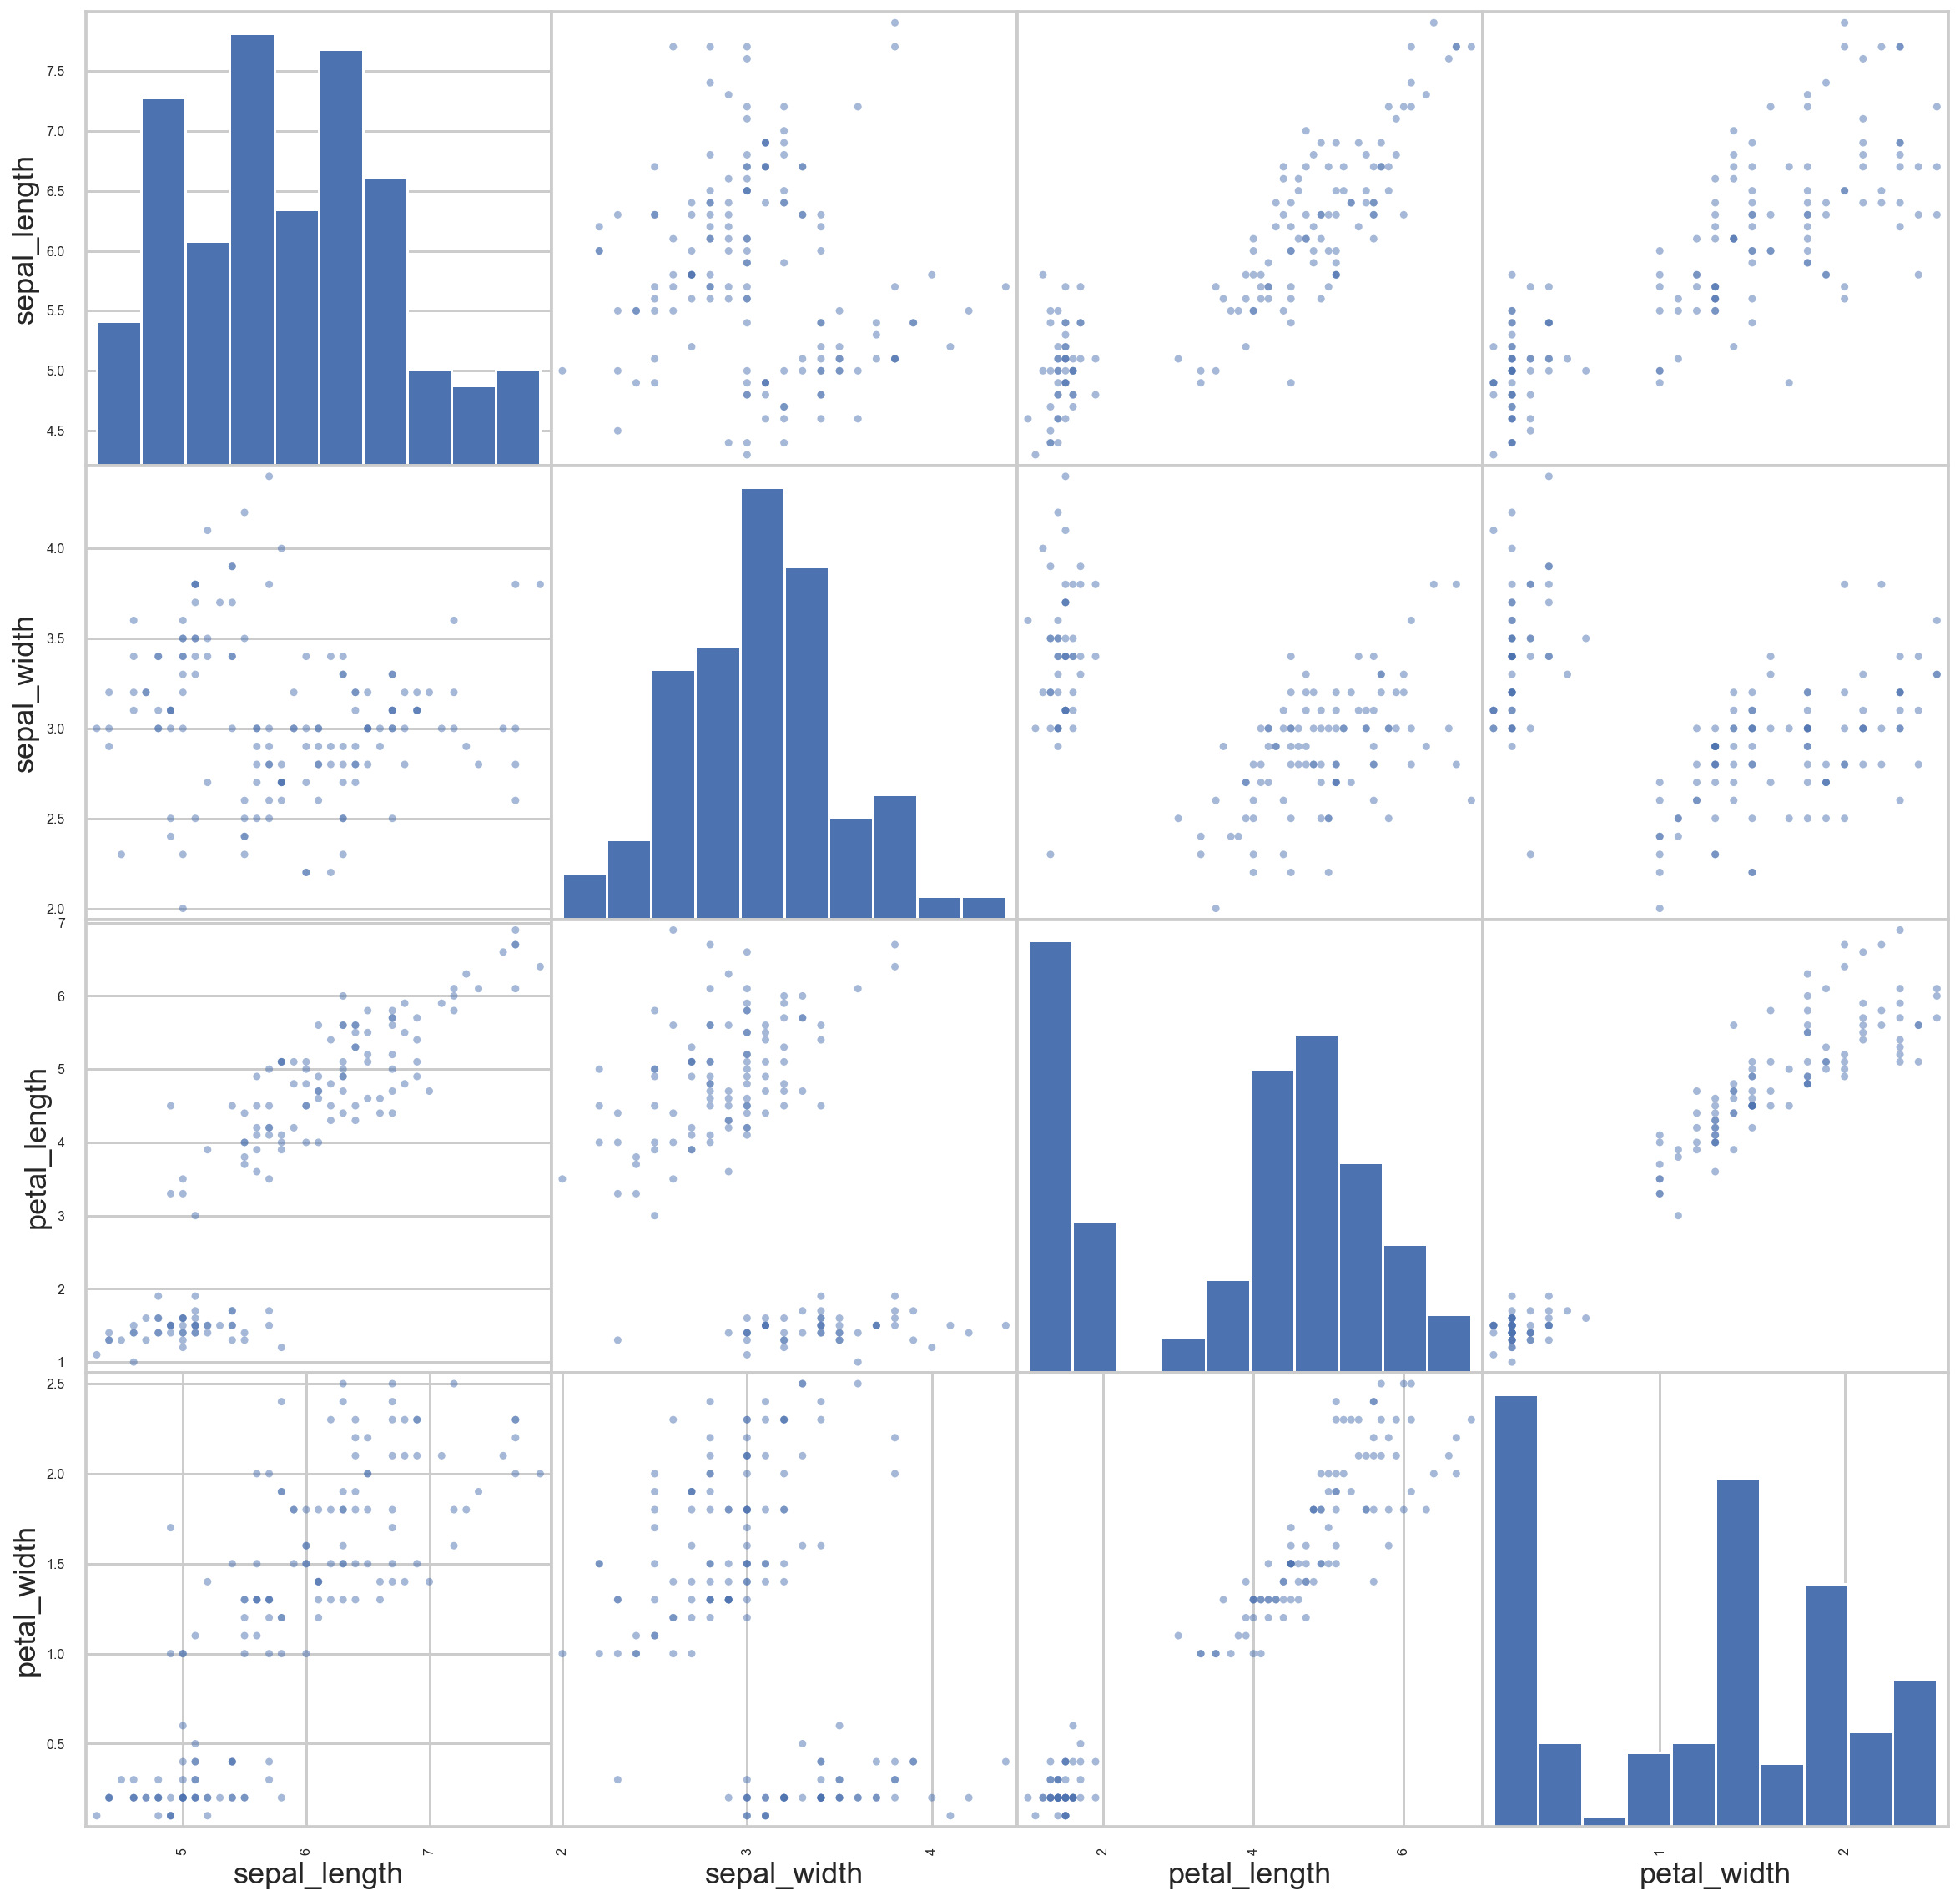

In [360]:
scatter_matrix(iris_dataset, alpha=0.5, figsize=(20, 20))
plt.show()

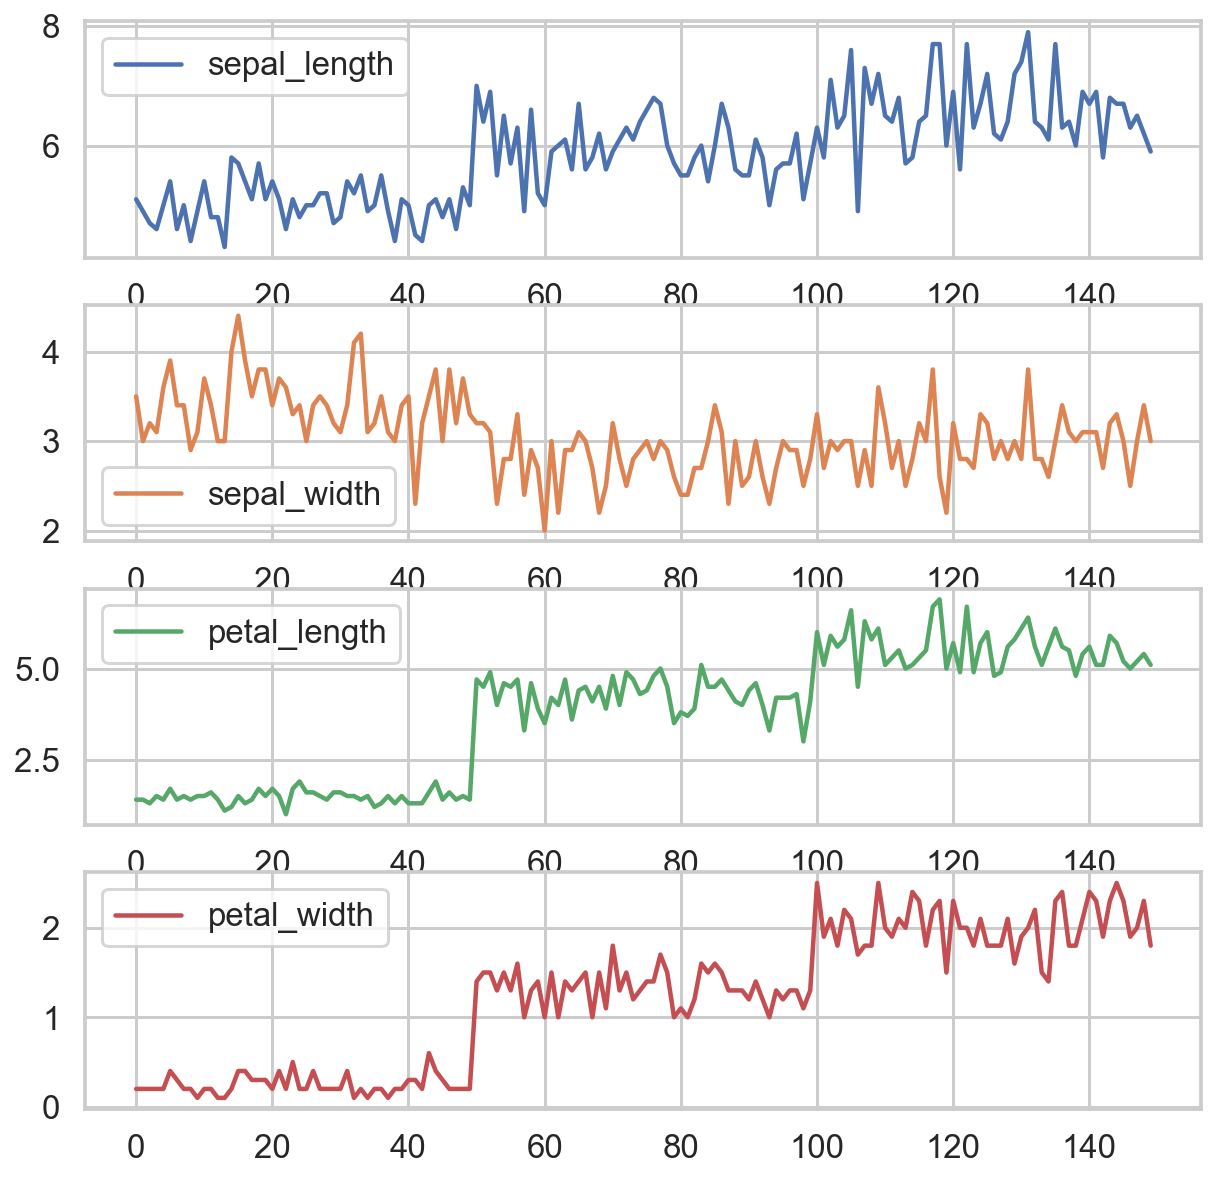

In [361]:
iris_dataset.plot(subplots=True, figsize=(10, 10), sharex=False, sharey=False)
plt.show()

### Data cleaning process

Doing number encoding for dataset label,
0: Iris-Setosa,
1: Iris-Versicolor,
2: Iris-Virginica,

In [362]:
print('[INFO] create numeric classes for species (0,1,2) ...')

iris_dataset.loc[iris_dataset['species']=='setosa','species']=0
iris_dataset.loc[iris_dataset['species']=='versicolor','species']=1
iris_dataset.loc[iris_dataset['species']=='virginica','species'] = 2

iris_label = np.array(iris_dataset['species'])
iris_data = np.array(iris_dataset[['sepal_length','sepal_width',
                                'petal_length', 'petal_width']])

[INFO] create numeric classes for species (0,1,2) ...


### Spliting dataset into training and testing

In [363]:
random.seed(123)

def separate_data():
    A = iris_dataset[0:40]
    tA = iris_dataset[40:50]
    B = iris_dataset[50:90]
    tB = iris_dataset[90:100]
    C = iris_dataset[100:140]
    tC = iris_dataset[140:150]
    train = np.concatenate((A,B,C))
    test =  np.concatenate((tA,tB,tC))
    return train,test

print('[INFO] separate data to train data and test data')
iris_dataset = np.column_stack((iris_data,iris_label.T)) #Join X and Y
iris_dataset = list(iris_dataset)
random.shuffle(iris_dataset)
Filetrain, Filetest = separate_data()

train_X = np.array([i[:4] for i in Filetrain]).astype('float')
train_y = np.array([i[4] for i in Filetrain]).astype('float')
test_X = np.array([i[:4] for i in Filetest]).astype('float')
test_y = np.array([i[4] for i in Filetest]).astype('float')

[INFO] separate data to train data and test data


In [364]:
print('train data shape: ', train_X.shape)
print('test data shape: ', test_X.shape)
print('train label shape: ', train_y.shape)
print('test label shape: ', test_y.shape)

train data shape:  (120, 4)
test data shape:  (30, 4)
train label shape:  (120,)
test label shape:  (30,)


### MLP Section

How MLP Work?
1. Step 1: Initialize weight and bias with small-random value
2. Step 2: Forward Propagation, propagate all value from input until the ouput layer
3. Step 3: Backpropagation, update weight and bias in inner layer by backward propagate from output to input
4. Step 4: Iteration untill stop condition is achived

<div style="text-align: center"> Ilustration of Forward Propagation process </div>

<img src="https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-11-52-57-pm.png">

<div style="text-align: center"> Ilustration of Backpropagation process </div>

<img src="https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-11-53-06-pm.png">

In [365]:
# Define MLP Class Object
class MultiLayerPerceptron: 
    def __init__(self, params=None):
        # Defaulf MLP Layer if not specify
        if (params == None):
            self.inputLayer = 4                        # Input Layer
            self.hiddenLayer = 5                       # Hidden Layer
            self.outputLayer = 3                       # Outpuy Layer
            self.learningRate = 0.005                  # Learning rate
            self.max_epochs = 600                      # Epochs
            self.BiasHiddenValue = -1                  # Bias HiddenLayer
            self.BiasOutputValue = -1                  # Bias OutputLayer
            self.activation = self.activation['sigmoid'] # Activation function
            self.deriv = self.deriv['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epochs']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.activation[params['ActivationFunction']]
            self.deriv = self.deriv[params['ActivationFunction']]
        
        # Initialize Weight and Bias value
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = 3 
        
    pass
    
    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]

    # Define activation and derivation function based on Mathematical formula
    activation = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x * 1.0))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
               }
    deriv = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0))
               }
    
    # Define Backpropagation process algoritm
    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        
        # Stage 1 - Error: OutputLayer
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
        
        arrayStore = []
        
        # Stage 2 - Update weights OutputLayer and HiddenLayer
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
      
        # Stage 3 - Error: HiddenLayer
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
 
        # Stage 4 - Update weights HiddenLayer and InputLayer(x)
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])
    
    # Function for plotting error value for each epoch
    def show_err_graphic(self,v_error,v_epoch):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoch, v_error, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()
    
    # Define predict function for prediction test data
    def predict(self, X, y):
        my_predictions = []
        
        # Just doing Forward Propagation
        forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output
                                 
        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])
            
        # Print predicted value    
        print(" Number of Sample  | Class |  Output  | Hoped Output")   
        for i in range(len(my_predictions)):
            if(my_predictions[i] == 0): 
                print("id:{}    | Iris-Setosa  |  Output: {} | Hoped Output:{}  ".format(i, my_predictions[i], y[i]))
            elif(my_predictions[i] == 1): 
                print("id:{}    | Iris-Versicolour    |  Output: {} | Hoped Output:{} ".format(i, my_predictions[i], y[i]))
            elif(my_predictions[i] == 2): 
                print("id:{}    | Iris-Iris-Virginica   |  Output: {} | Hoped Output:{} ".format(i, my_predictions[i], y[i]))
                
        return my_predictions
        pass

    # Define fit function for training process with train data
    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X);
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                self.output = np.zeros(self.classes_number)
                
                # Stage 1 - (Forward Propagation)'
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                
                # Stage 2 - One-Hot-Encoding
                if(y[idx] == 0): 
                    self.output = np.array([1,0,0]) #Class1 {1,0,0}
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0]) #Class2 {0,1,0}
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1]) #Class3 {0,0,1}
                
                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error
         
                # Backpropagation : Update Weights
                self.Backpropagation_Algorithm(inputs)
                
            total_error = (total_error / n)
            
            # Print error value for each epoch
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
                
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)
             
                
            count_epoch += 1
            
        self.show_err_graphic(error_array,epoch_array)
        
        # Print weight Hidden layer acquire during training
        print('')
        print('weight value of Hidden layer acquire during training: ')
        print(W0[0])
        
        # Plot weight Output layer acquire during training
        print('')
        print('weight value of Output layer acquire during training: ')
        print(W1[0])

        return self

### Train MLP Model using train data

MLP Classifier Model summary: 
1. Input Layer: 4
2. Hidden Layer: 5
3. Output Layer: 3
4. Epoch: 700
5. Learning Rate: 0.005
6. Activation Function: sigmoid

Epoch  1 - Total Error:  0.08936357150024009
Epoch  50 - Total Error:  0.05372528235746763
Epoch  100 - Total Error:  0.03767830046688724
Epoch  150 - Total Error:  0.031150650050135013
Epoch  200 - Total Error:  0.028400763121875304
Epoch  250 - Total Error:  0.0266846404597434
Epoch  300 - Total Error:  0.02523095496911937
Epoch  350 - Total Error:  0.023835334418031526
Epoch  400 - Total Error:  0.02242216116909146
Epoch  450 - Total Error:  0.020967941975434983
Epoch  500 - Total Error:  0.019480678845146746
Epoch  550 - Total Error:  0.01797327121331409
Epoch  600 - Total Error:  0.0164229070590398
Epoch  650 - Total Error:  0.014827759472965711
Epoch  700 - Total Error:  0.013362750473605663


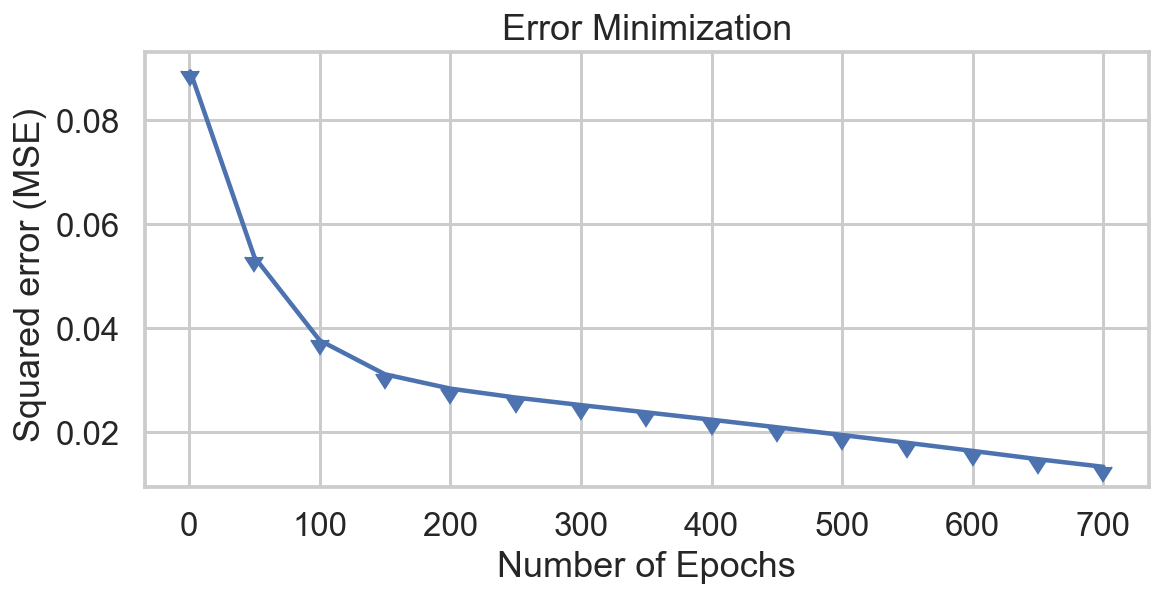


weight value of Hidden layer acquire during training: 
[[-1.2144479901761935, -1.0237235867746801, 1.1593402180504824, -0.9510205697571245, 0.21282400398954074], [-1.828308534920255, -0.6174988029663058, 0.8822982250033891, 0.10538148610868076, 0.5623782407598591], [2.376995940983432, 2.673320503208607, -1.8946808650670917, -0.22637674368743033, -0.9738675597590902], [0.8274442502250032, 0.544902904567468, -0.4176102462987161, 0.6713496504613647, -0.26302362790003486]]

weight value of Output layer acquire during training: 
[[-1.7322627770013823, -2.9665545091908316, 2.091391511704845], [-3.4584624952157936, 1.6162436967706781, 0.9452808698855428], [1.6823684352932098, -0.12123161097583737, -3.538001870802378], [-0.03755381210005162, 0.41622361402886393, 0.35784572336605297], [1.048241273174239, -1.8167493762545408, -1.6188648081621941]]


In [366]:
# Lets get try our MLP
dictionary = {'InputLayer':4, 'HiddenLayer':5, 'OutputLayer':3,
              'Epochs':700, 'LearningRate':0.005,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'sigmoid'}

Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(train_X,train_y)

### Predict Test Data using MLP Model

In [380]:
pred = Perceptron.predict(test_X,test_y)

pred = np.array(pred)
true = test_y.astype('int')

def compute_confusion_matrix(true, pred):
    '''
    Computes a confusion matrix using numpy for two np.arrays
    true and pred.Results are identical (and similar in computation time) to: 
    "from sklearn.metrics import confusion_matrix"
    However, this function avoids the dependency on sklearn.
    '''
    K = len(np.unique(true)) # Number of classes 
    result = np.zeros((K, K))
    
    for i in range(len(true)):
        result[true[i]][pred[i]] += 1
    
    return result

conf_matrix = compute_confusion_matrix(true, pred)
print('Confussion matrix result: ')
print(conf_matrix)

Confussion matrix result: 
[[ 8.  0.  0.]
 [ 0. 15.  1.]
 [ 0.  0.  6.]]


### Classification Report

<div style="text-align: center"> Classifier Performance report based on this formula </div>

<img src="https://i.stack.imgur.com/U0hjG.png">

In [400]:
classes = ['setosa    ', 'versicolor', 'virginica ']

def accuracy_average(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def f1_score(label, confusion_matrix):
    num = precision(label, confusion_matrix) * recall(label, confusion_matrix)
    denum = precision(label, confusion_matrix) + recall(label, confusion_matrix)
    return 2 * (num/denum)

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

def f1_score_average(confusion_matrix):
    num = precision_macro_average(confusion_matrix) * recall_macro_average(confusion_matrix)
    denum = precision_macro_average(confusion_matrix) + recall_macro_average(confusion_matrix)
    return 2 * (num/denum)

print("label      precision  recall  f1_score")
for index in range(len(classes)):
    print(f"{classes[index]} {precision(index, conf_matrix):9.3f} {recall(index, conf_matrix):6.3f}  {f1_score(index, conf_matrix):6.3f}")

print()
print('Average accuracy:  ', accuracy_average(conf_matrix))
print('Average precision: ', precision_macro_average(conf_matrix))
print('Average recall:    ', recall_macro_average(conf_matrix))
print('Average F1 score:  ', f1_score_average(conf_matrix))


label      precision  recall  f1_score
setosa         1.000  1.000   1.000
versicolor     1.000  0.938   0.968
virginica      0.857  1.000   0.923

Average accuracy:   0.9666666666666667
Average precision:  0.9523809523809524
Average recall:     0.9791666666666666
Average F1 score:   0.965588084232152
